In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import pickle
import seaborn as sns

sys.path.insert(1, '../')
from Prepare_Events_Functions import *
from Plot_events_functions import *
from Profiles_Functions import *

In [2]:
quintile_mapping = {1: 'F2', 2: 'F1', 3: 'C', 4: 'B1', 5: 'B2'}
# quintile_cats_loading = ['F2','F1', 'C', 'B1', 'B2']

present_future_lookup = {'bc005': 'Present','bc006': 'Present','bc007': 'Present','bc009': 'Present','bc010': 'Present',
                         'bc011': 'Present', 'bc012': 'Present','bc013': 'Present','bc015': 'Present','bc016': 'Present', 
                         'bc017': 'Present','bc018': 'Present',
                        'nimrod': 'NIMROD',
                        'bb189': 'Future', 'bb192': 'Future','bb195': 'Future','bb198': 'Future','bb201': 'Future',
                        'bb204': 'Future','bb208': 'Future','bb211': 'Future','bb216': 'Future','bb219': 'Future',
                        'bb222': 'Future', 'bb225': 'Future'}

# Define the list of identifiers
ids = ['nimrod', 
       'bc005', 'bc006', 'bc007', 'bc009', 'bc010','bc011', 'bc012','bc013','bc015', 'bc016', 'bc017', 'bc018',
       'bb189','bb192', 'bb195', 'bb198', 'bb201', 'bb204','bb208' ,'bb211','bb216','bb219','bb222','bb225']

# Define the corresponding labels for each identifier
labels = [f'UKCP18_present ({id})' if present_future_lookup[id] == 'Present' else f'UKCP18_future ({id})' if present_future_lookup[id] == 'Future' else 'NIMROD' for id in ids]

In [ ]:
rvh_profiles = pd.read_csv("../../../CatchmentAnalysis/CreateSyntheticRainfallEvents/ObservedProfiles/kmeans_15clustersPerDur.csv")
# # Just keep prain (proportion of rainfall in each timestep)
rvh_profiles = rvh_profiles[rvh_profiles['Variable'] == 'irain']
rvh_profiles = rvh_profiles[rvh_profiles['Duration'] == '[2:10 - 6:45) hr']

# fig, axs = plt.subplots(ncols=5,figsize=(12, 6), sharey=True)
# axs[-1].annotate("0.25-2.10 hrs", xy=(1.05, 0.5), xycoords='axes fraction',
#                       fontsize='large', ha='left', va='center', rotation=90);

# Read in data

In [3]:
with open("/nfs/a319/gy17m2a/PhD/ProcessedData/Profiles/All_30mins/dataframes.pkl", 'rb') as file:
    dataframes = pickle.load(file)  

In [4]:
present_ids = [id for id in ids if present_future_lookup.get(id) == 'Present']
present_dataframes = pd.concat([dataframes[id] for id in present_ids], ignore_index=True)

future_ids = [id for id in ids if present_future_lookup.get(id) == 'Future']
future_dataframes = pd.concat([dataframes[id] for id in future_ids], ignore_index=True)

In [5]:
dataframes_top10percent = {id: keep_top_x_percent(10,df ) for id, df in dataframes.items()}
dataframes_top1percent = {id: keep_top_x_percent(1,df ) for id, df in dataframes.items()}

In [6]:
present_dataframes_top10percent = pd.concat([dataframes_top10percent[id] for id in present_ids], ignore_index=True)
future_dataframes_top10percent = pd.concat([dataframes_top10percent[id] for id in future_ids], ignore_index=True)

### Create dataframes for plotting boxplots

In [7]:
combined_df_loading = prepare_combined_data(dataframes, 'Loading_profile_molly', ids, present_future_lookup)

combined_df_durations_notpersonalised = prepare_combined_data(dataframes, 'DurationRange_notpersonalised', ids, present_future_lookup)
combined_df_durations_personalised = prepare_combined_data(dataframes, 'DurationRange_personalised', ids, present_future_lookup)
combined_df_durations = prepare_combined_data(dataframes, 'duration', ids, present_future_lookup)

### Create versions of these boxplot dataframes, containing just data for the present or just data from the future

In [8]:
combined_df_durations_present =combined_df_durations[combined_df_durations['TimePeriod']=='Present'] 
combined_df_durations_future =combined_df_durations[combined_df_durations['TimePeriod']=='Future'] 

# Profiles

In [9]:
# duration_bin_1 =present_dataframes[present_dataframes["DurationRange_notpersonalised"]=='0.25-2.10 hr']
# duration_bin_2 =present_dataframes[present_dataframes["DurationRange_notpersonalised"]=='2.10-6.45 hr']
# duration_bin_3 =present_dataframes[present_dataframes["DurationRange_notpersonalised"]=='6.45-19.25 hr']
# duration_bin_4 =present_dataframes[present_dataframes["DurationRange_notpersonalised"]=='19.25+ hr']

### Containing all ensemble members - takes ages to plot

In [10]:
# # Prepare the subplots
# fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(13, 8), sharey=True)

# # Plot df in the first row and df2 in the second row
# plot_profiles_by_percentile(axs[0, :], duration_bin_1)  # First row
# plot_profiles_by_percentile(axs[1, :], duration_bin_2)  # Second row
# plot_profiles_by_percentile(axs[2, :], duration_bin_3)  # First row
# plot_profiles_by_percentile(axs[3, :], duration_bin_4)  # Second row

# # Add column labels with boxes
# column_labels = ['F2', 'F1', 'C', 'B1', 'B2']
# for ax, label in zip(axs[0, :], column_labels):
#     ax.set_title(label, pad=10, bbox={'facecolor': 'white', 'edgecolor': 'black', 'boxstyle': 'round,pad=0.3'})

# # Adjust layout and display the figure
# fig.tight_layout()
# fig.supylabel('Dimensionless rainfall Rd', x=-0.01)
# plt.show()

In [11]:
df=dataframes['bc005']
duration_bin_1 =df[df["DurationRange_notpersonalised"]=='0.25-2.10 hr']
duration_bin_2 =df[df["DurationRange_notpersonalised"]=='2.10-6.45 hr']
duration_bin_3 =df[df["DurationRange_notpersonalised"]=='6.45-19.25 hr']
duration_bin_4 =df[df["DurationRange_notpersonalised"]=='19.25+ hr']

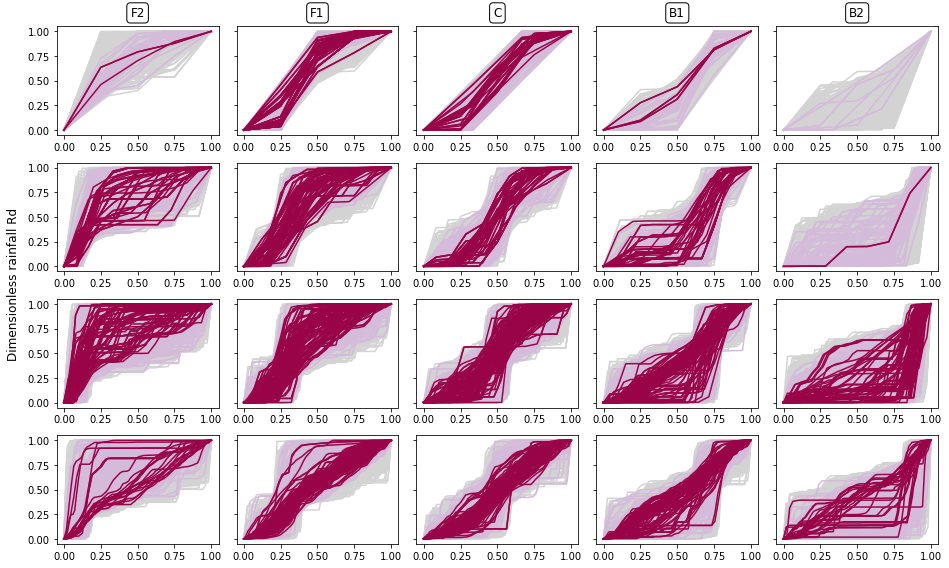

In [12]:
# Prepare the subplots
fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(13, 8), sharey=True)

# Plot df in the first row and df2 in the second row
plot_profiles_by_percentile(axs[0, :], duration_bin_1)  # First row
plot_profiles_by_percentile(axs[1, :], duration_bin_2)  # Second row
plot_profiles_by_percentile(axs[2, :], duration_bin_3)  # First row
plot_profiles_by_percentile(axs[3, :], duration_bin_4)  # Second row

# Add column labels with boxes
column_labels = ['F2', 'F1', 'C', 'B1', 'B2']
for ax, label in zip(axs[0, :], column_labels):
    ax.set_title(label, pad=10, bbox={'facecolor': 'white', 'edgecolor': 'black', 'boxstyle': 'round,pad=0.3'})

# Adjust layout and display the figure
fig.tight_layout()
fig.supylabel('Dimensionless rainfall Rd', x=-0.01)
plt.show()

# Plot summary profiles

### Create centroids

#### For each ensemble member individually, all events

In [13]:
# Initialize dictionaries to store labels and centroids
labels_dict = {}
centroids_dict = {}

for id in ids:
    timeperiod = present_future_lookup[id]
    
    for num_clusters in [5, 10, 15]:

        # Calculate labels and centroids using k-means
        labels, centroids = create_kmeans_centroids(dataframes[id], num_clusters)

        # Store the labels and centroids in the dictionaries
        labels_dict[(id, num_clusters)] = labels
        centroids_dict[(id, num_clusters)] = centroids

#### For each ensemble member individuallytop 10% events

In [14]:
labels_top10percent_dict = {}
centroids_top10percent_dict = {}

for id in ids:
    timeperiod = present_future_lookup[id]
    
    for num_clusters in [5, 10, 15]:

        # Calculate labels and centroids using k-means
        labels, centroids = create_kmeans_centroids(dataframes_top10percent[id], num_clusters)

        # Store the labels and centroids in the dictionaries
        labels_top10percent_dict[(id, num_clusters)] = labels
        centroids_top10percent_dict[(id, num_clusters)] = centroids

In [19]:
labels_allpresent, centroids_allpresent = create_kmeans_centroids(present_dataframes, 5)
labels_allfuture, centroids_allfuture = create_kmeans_centroids(future_dataframes, 5)

labels_allpresent_top10percent, centroids_allpresent_top10percent = create_kmeans_centroids(present_dataframes_top10percent, 5)
labels_allfuture_top10percent, centroids_allfuture_top10percent = create_kmeans_centroids(future_dataframes_top10percent, 5)

In [28]:
def plot_centroids(axs, row, centroids, color, linewidth):
    for num, centroid_cumulative in enumerate(centroids):

        # Time in hours
        time_hours = np.arange(len(centroid_cumulative))  

        # Find portion which is heaviest
        # heaviest_segment = categorize_normalized_rainstorm(centroid_cumulative)
        quintile_with_max_value = find_quintile_with_max_value(centroid_cumulative)
        i = quintile_with_max_value
        
        axs[row, i].plot(time_hours, centroid_cumulative, color=color, linestyle='-', linewidth=linewidth)
        
        if row == 0:
            axs[row, i].set_title(f'Quintile {i + 1}')  

In [32]:
# Mapping for color and linewidth based on timeperiod
style_mapping = {'NIMROD': {'color': 'black', 'linewidth': 2},
    'Present': {'color': 'red', 'linewidth': 2},
    'Future': {'color': 'green', 'linewidth': 2}}

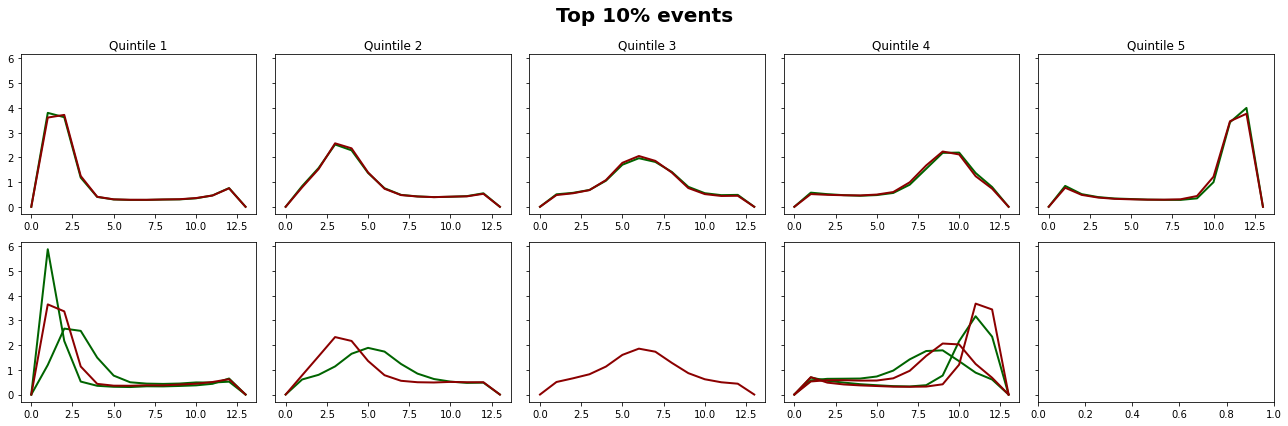

In [33]:
# Create the subplots
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(18, 6), sharey=True)


plot_centroids(axs, 0, centroids_allpresent, 'darkgreen', style_mapping['Present']['linewidth'])
plot_centroids(axs, 0, centroids_allfuture, 'darkred', style_mapping['Future']['linewidth'])

plot_centroids(axs, 1, centroids_allpresent_top10percent, 'darkgreen', style_mapping['Present']['linewidth'])
plot_centroids(axs, 1, centroids_allfuture_top10percent, 'darkred', style_mapping['Future']['linewidth'])

fig.suptitle('Top 10% events', fontweight="bold", fontsize=20);
fig.tight_layout();

In [39]:
# fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(13, 8), sharey=True)
# labels, centroids = create_kmeans_centroids(df, 5)
# plot_centroids(axs ,0, centroids, 'black', 1)

# labels, centroids = create_kmeans_centroids(df, 10)
# plot_centroids(axs,1, centroids, 'black', 1)

# labels, centroids = create_kmeans_centroids(df, 15)
# plot_centroids(axs,2, centroids, 'black', 1)
# for cluster_num in range(1,14):
#     cluster1=rvh_profiles[rvh_profiles['Cluster']==cluster_num]
#     cluster1 = cluster1.sort_values(by='Dur_bins')
#     profile_shape =np.unique(cluster1['Profile_shape'])[0]
#     loading = {v: k for k, v in quintile_mapping.items()}[profile_shape] -1
#     axs[2, loading].plot(range(len(cluster1)),cluster1['Mean'], linewidth = 2, color='purple')  

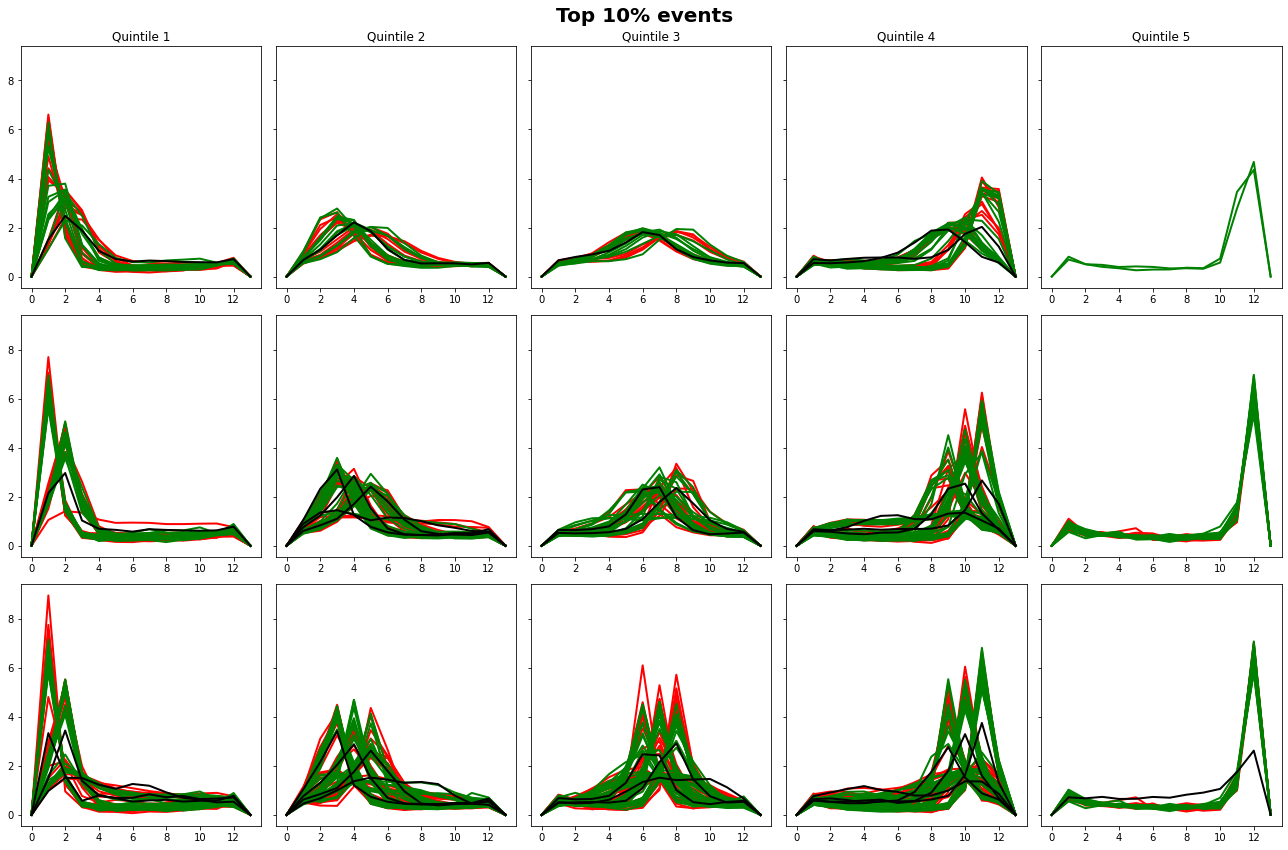

In [37]:
# Create the subplots
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(18, 12), sharey=True)

# Loop over each id and plot the stored centroids
for i, id in enumerate(ids[1:] +['nimrod']):
    timeperiod = present_future_lookup[id]
    
    for ax_num, num_clusters in enumerate([5, 10, 15]):
        # Retrieve the centroids from the dictionary
        centroids = centroids_top10percent_dict[(id, num_clusters)]
        
        # Get style from the mapping
        style = style_mapping[timeperiod]
        
        # Plot the centroids on the axes
        plot_centroids(axs, ax_num, centroids, style['color'], style['linewidth'])
    
fig.suptitle('Top 10% events', fontweight="bold", fontsize=20);
fig.tight_layout();

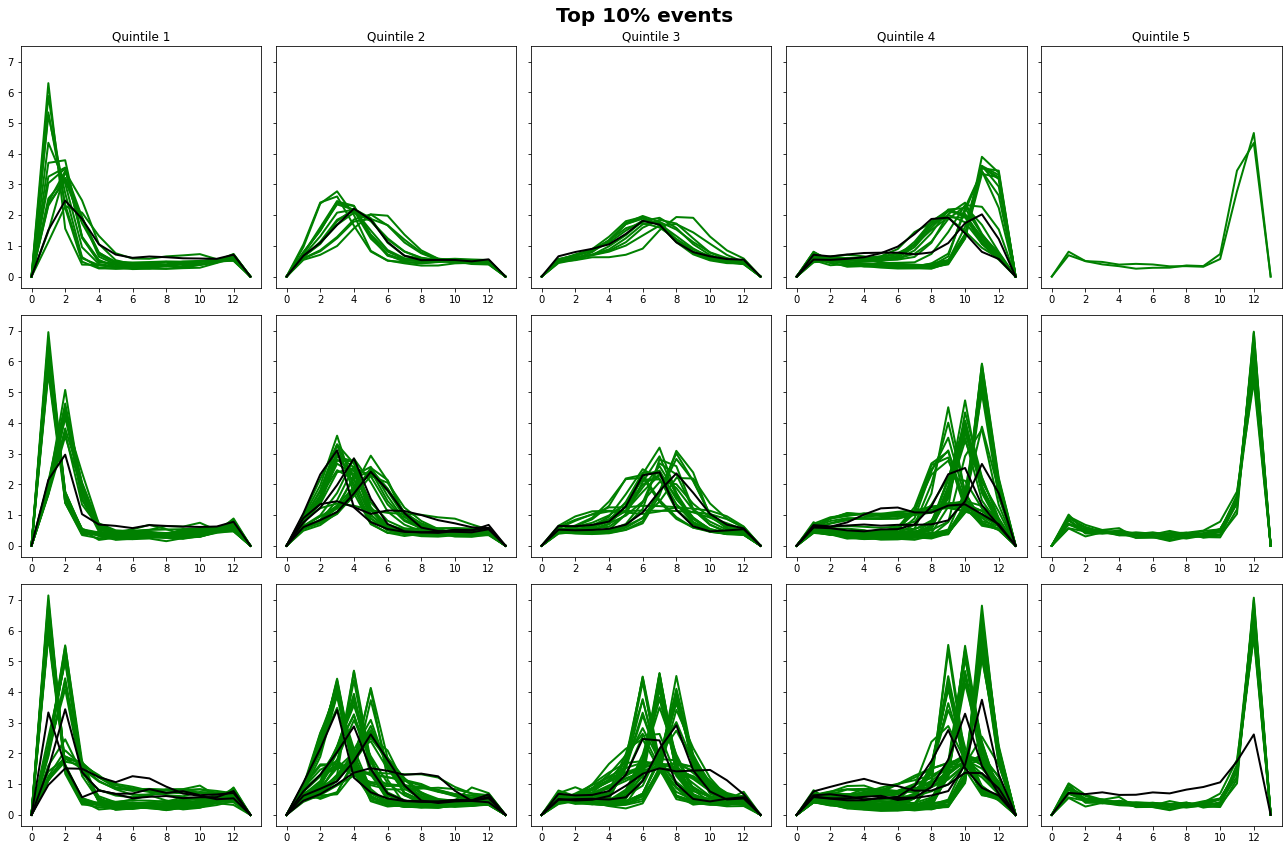

In [38]:
# Create the subplots
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(18, 12), sharey=True)

# Loop over each id and plot the stored centroids
for i, id in enumerate(future_ids + ['nimrod']):
    timeperiod = present_future_lookup[id]
    
    for ax_num, num_clusters in enumerate([5, 10, 15]):
        # Retrieve the centroids from the dictionary
        centroids = centroids_top10percent_dict[(id, num_clusters)]
        
        # Get style from the mapping
        style = style_mapping[timeperiod]
        
        # Plot the centroids on the axes
        plot_centroids(axs, ax_num, centroids, style['color'], style['linewidth'])
    
fig.suptitle('Top 10% events', fontweight="bold", fontsize=20);
fig.tight_layout()

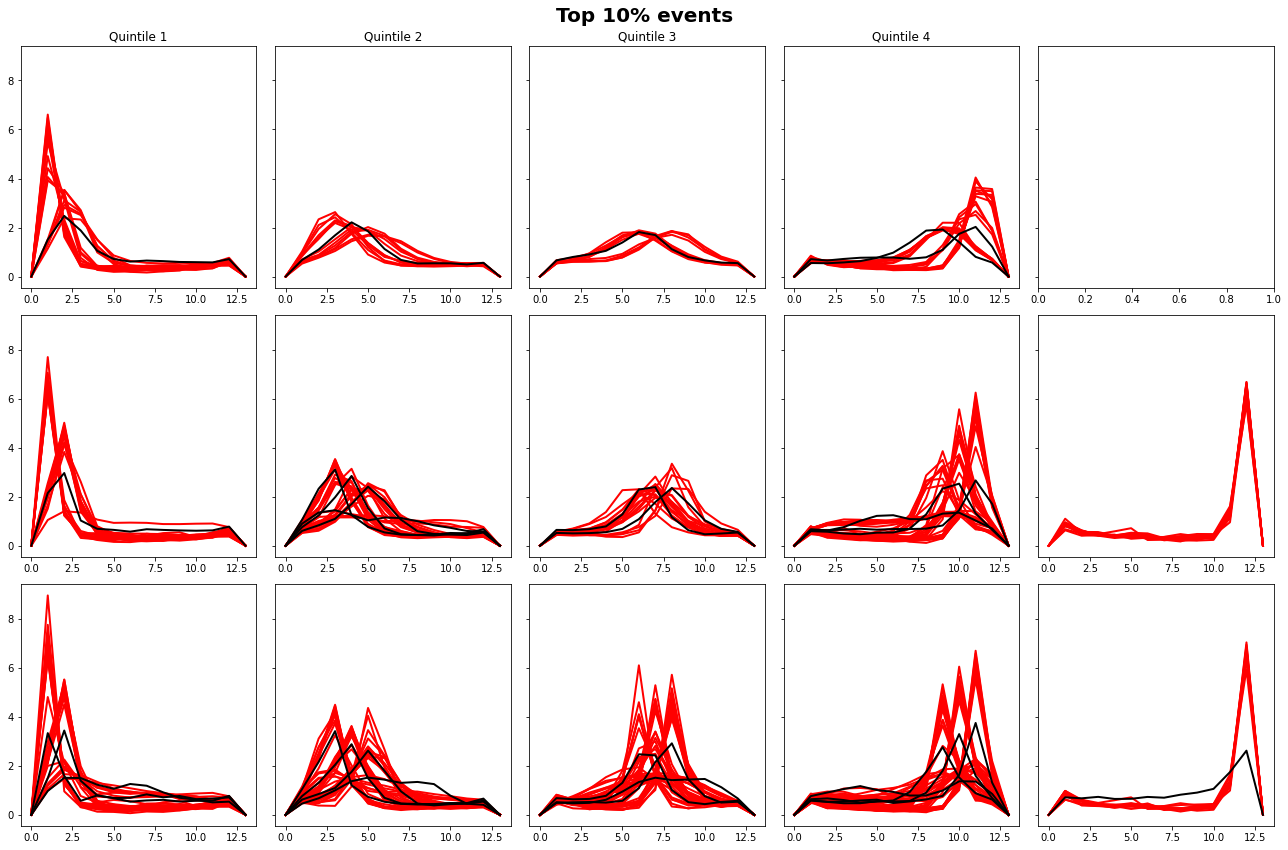

In [40]:
# Create the subplots
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(18, 12), sharey=True)

# Loop over each id and plot the stored centroids
for i, id in enumerate(present_ids + ['nimrod']):
    timeperiod = present_future_lookup[id]
    
    for ax_num, num_clusters in enumerate([5, 10, 15]):
        # Retrieve the centroids from the dictionary
        centroids = centroids_top10percent_dict[(id, num_clusters)]
        
        # Get style from the mapping
        style = style_mapping[timeperiod]
        
        # Plot the centroids on the axes
        plot_centroids(axs, ax_num, centroids, style['color'], style['linewidth'])
    
# Add the overall title
fig.suptitle('Top 10% events', fontweight="bold", fontsize=20);
fig.tight_layout()